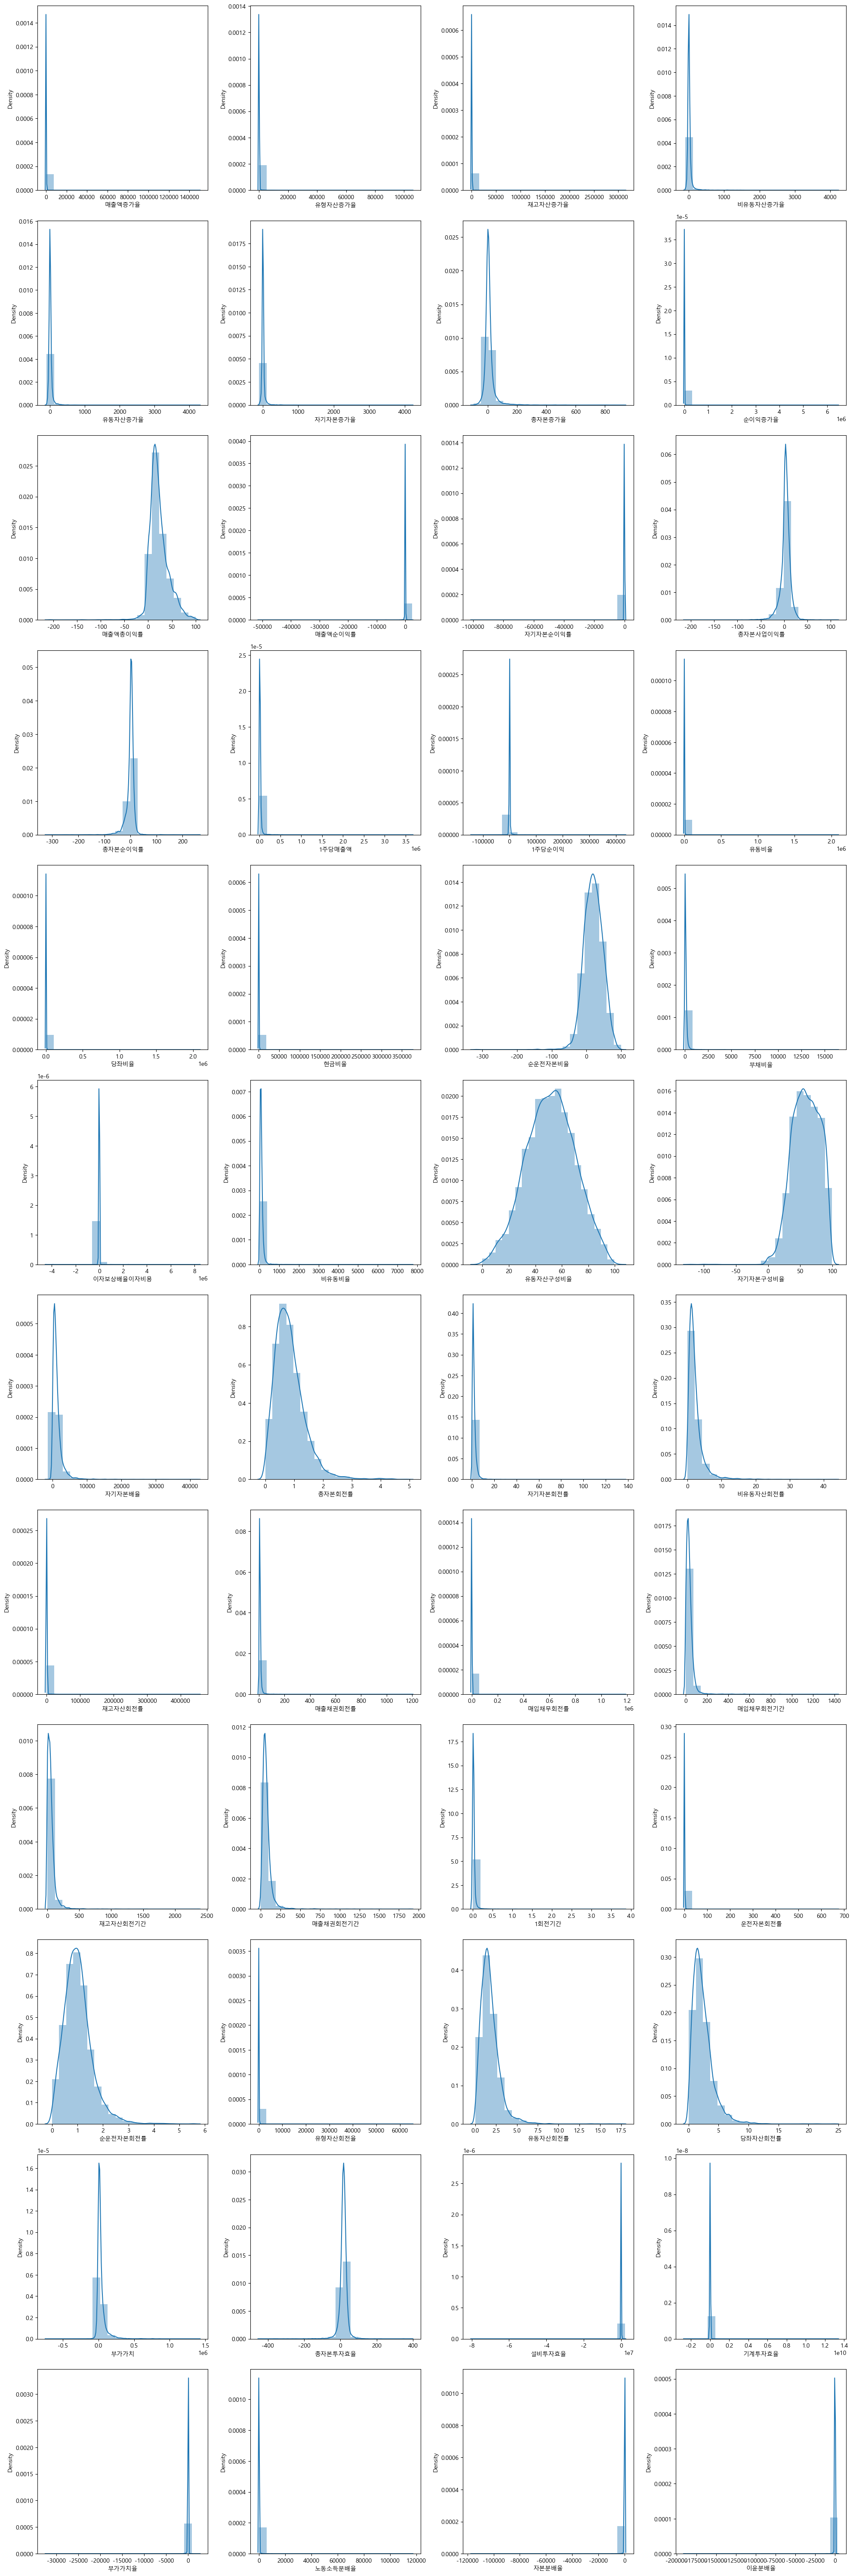

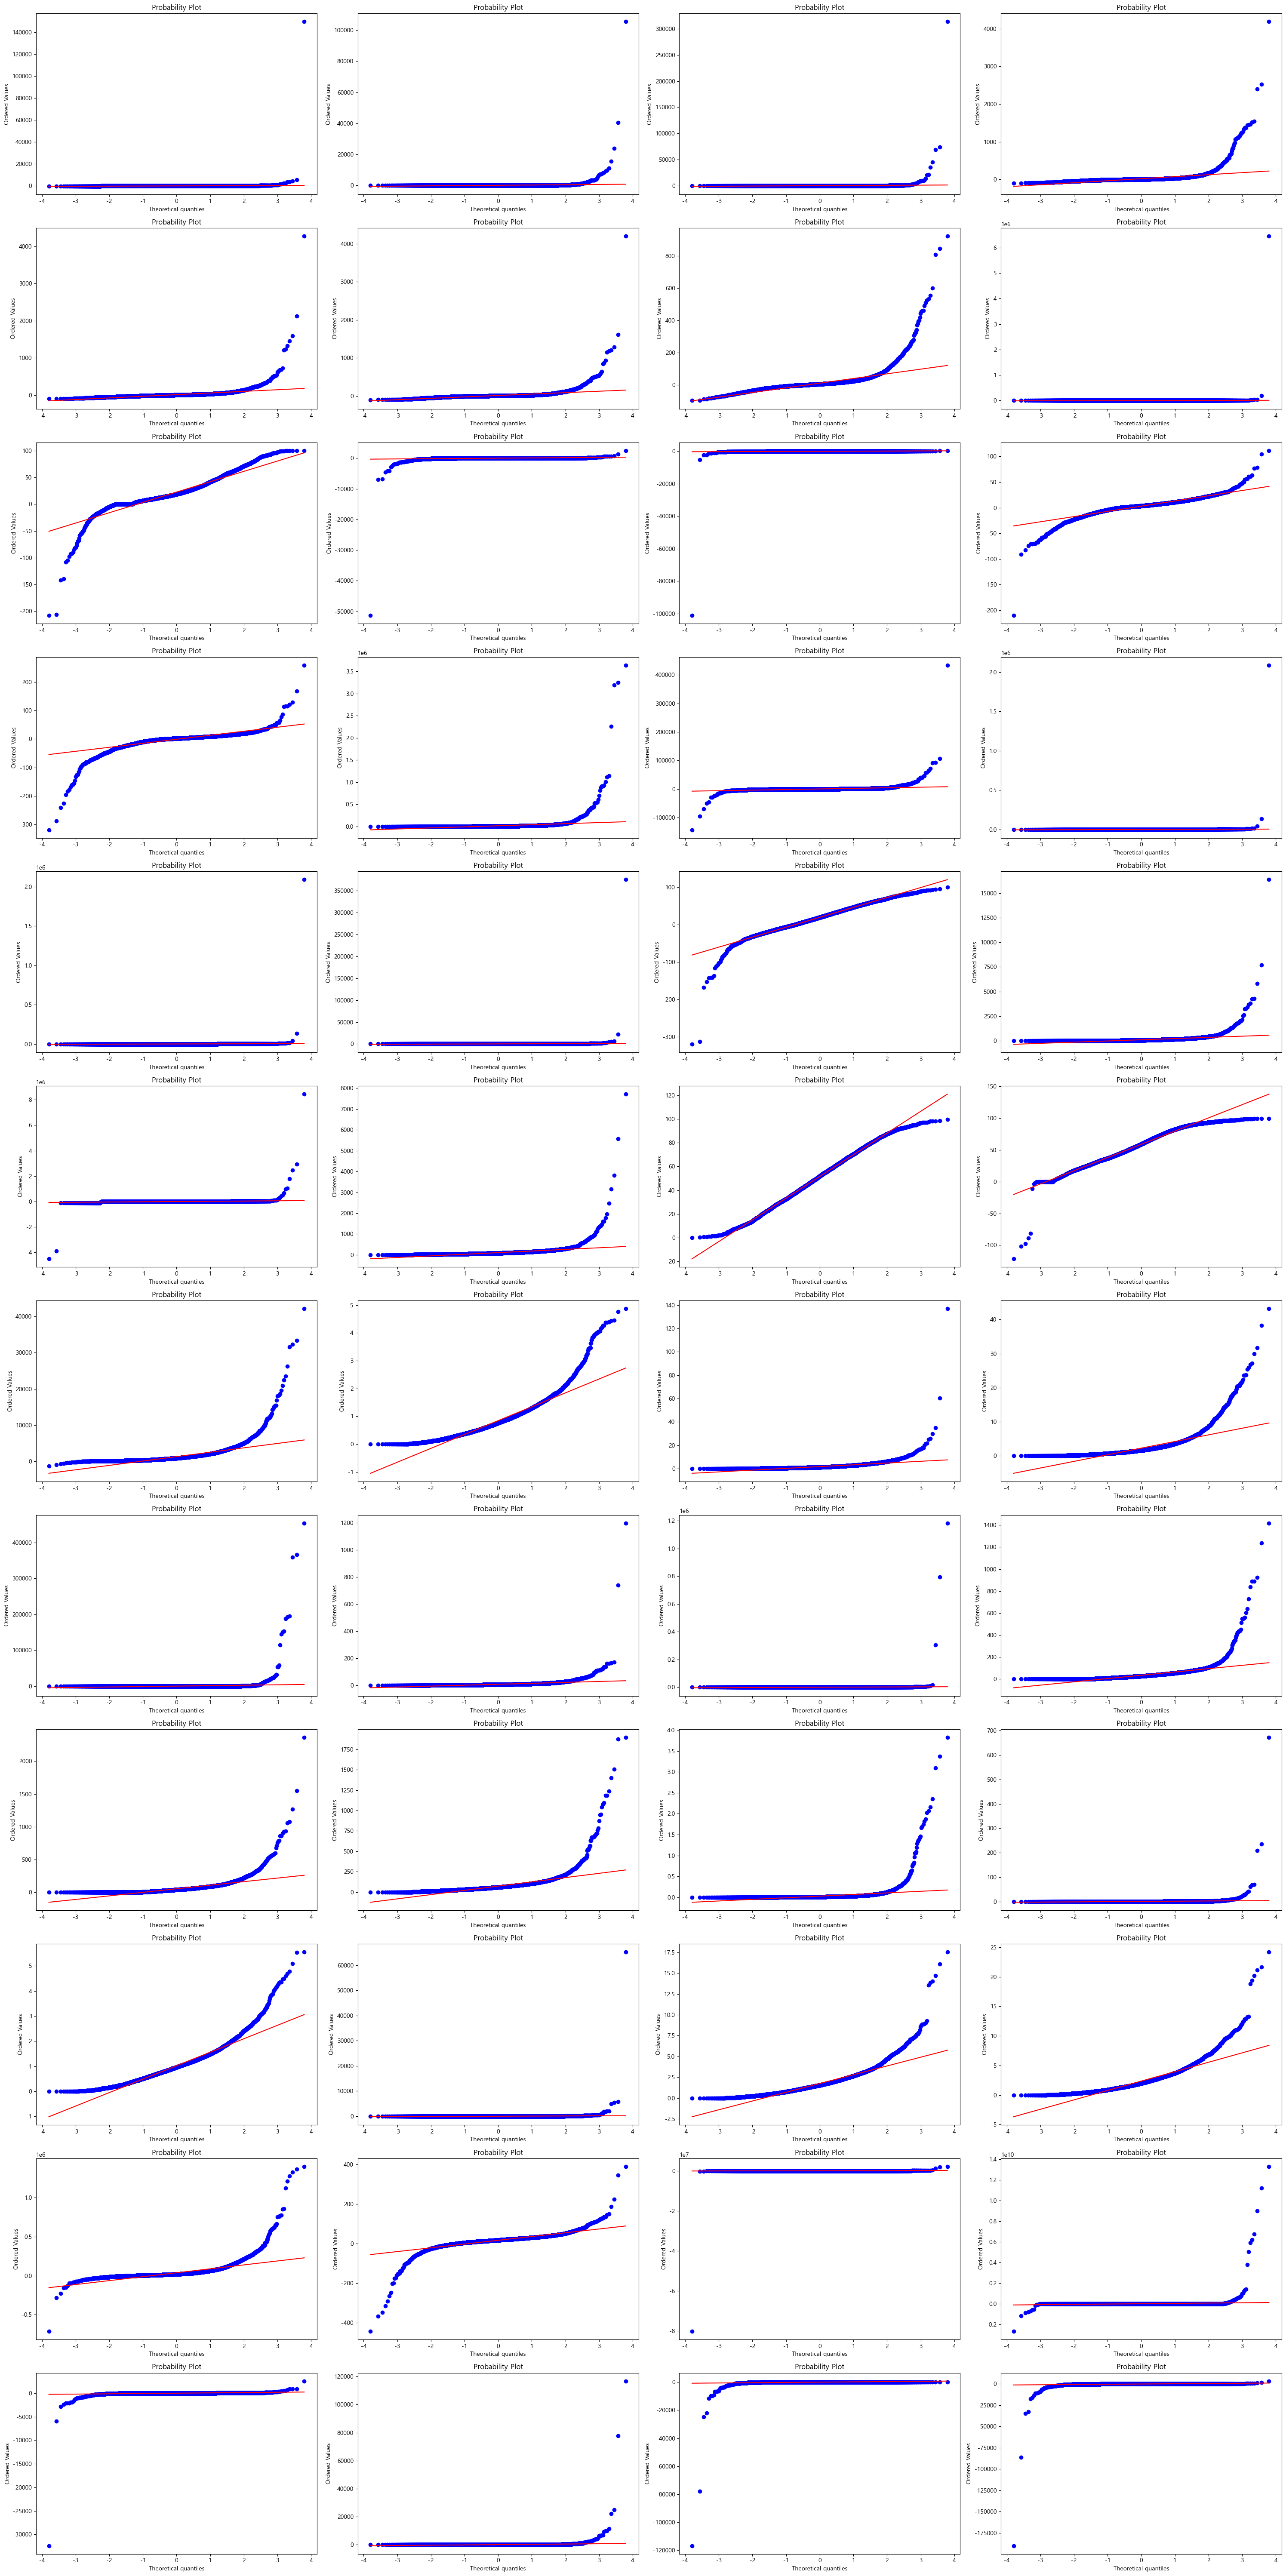

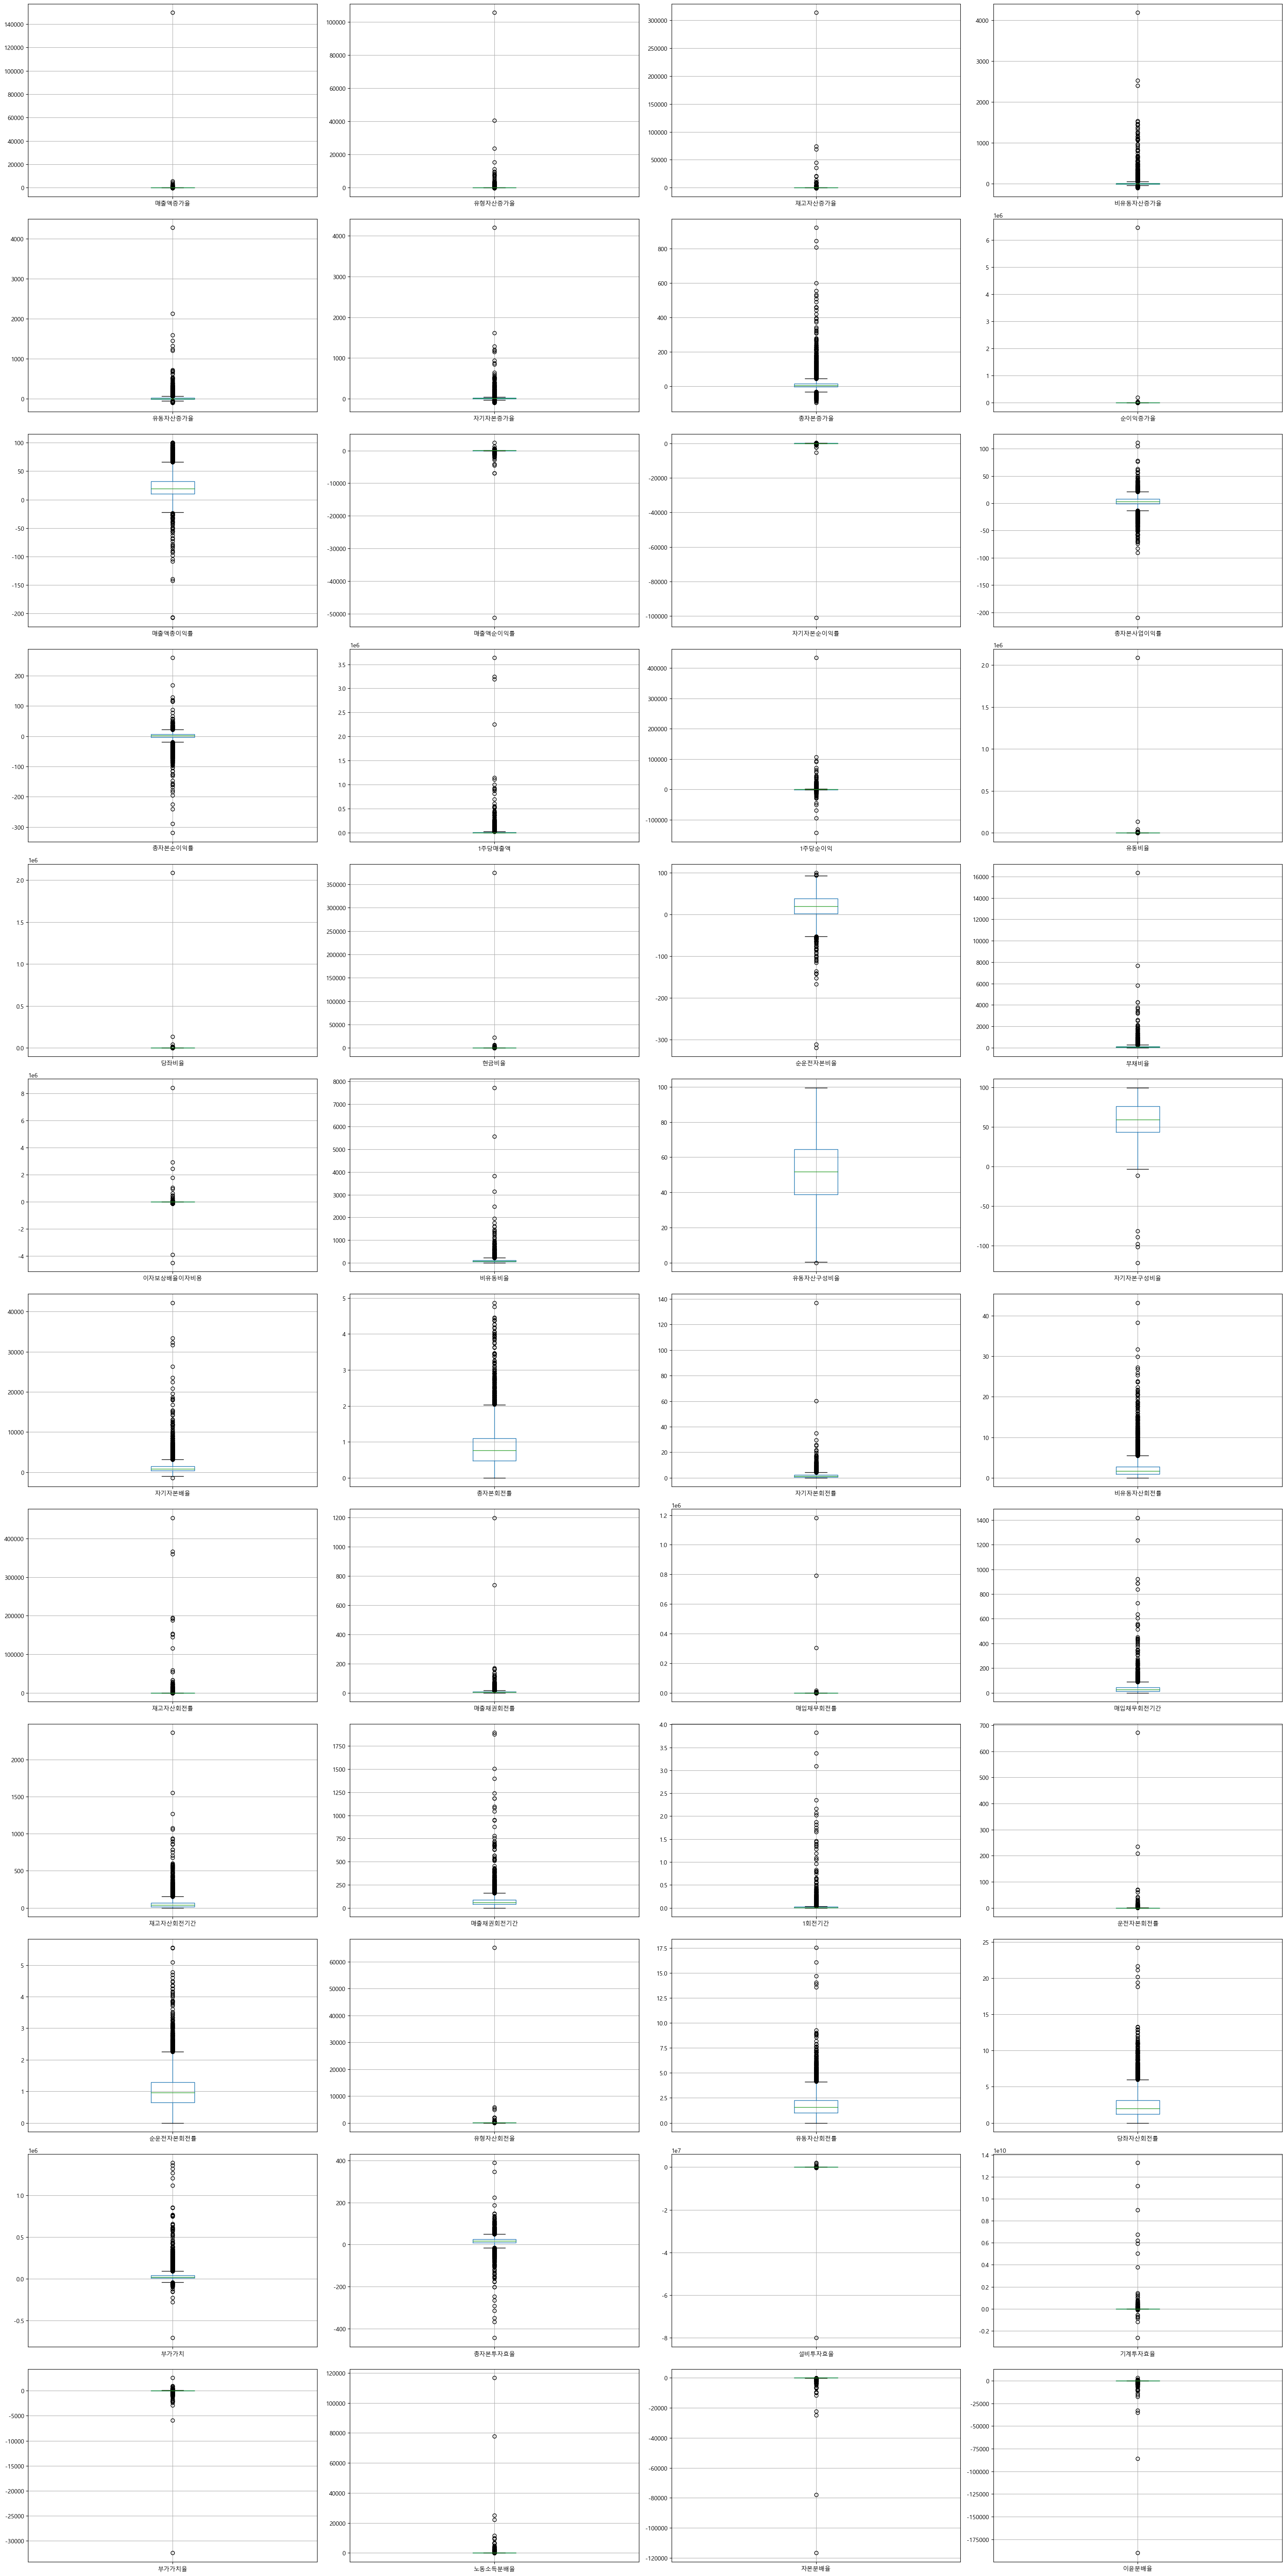

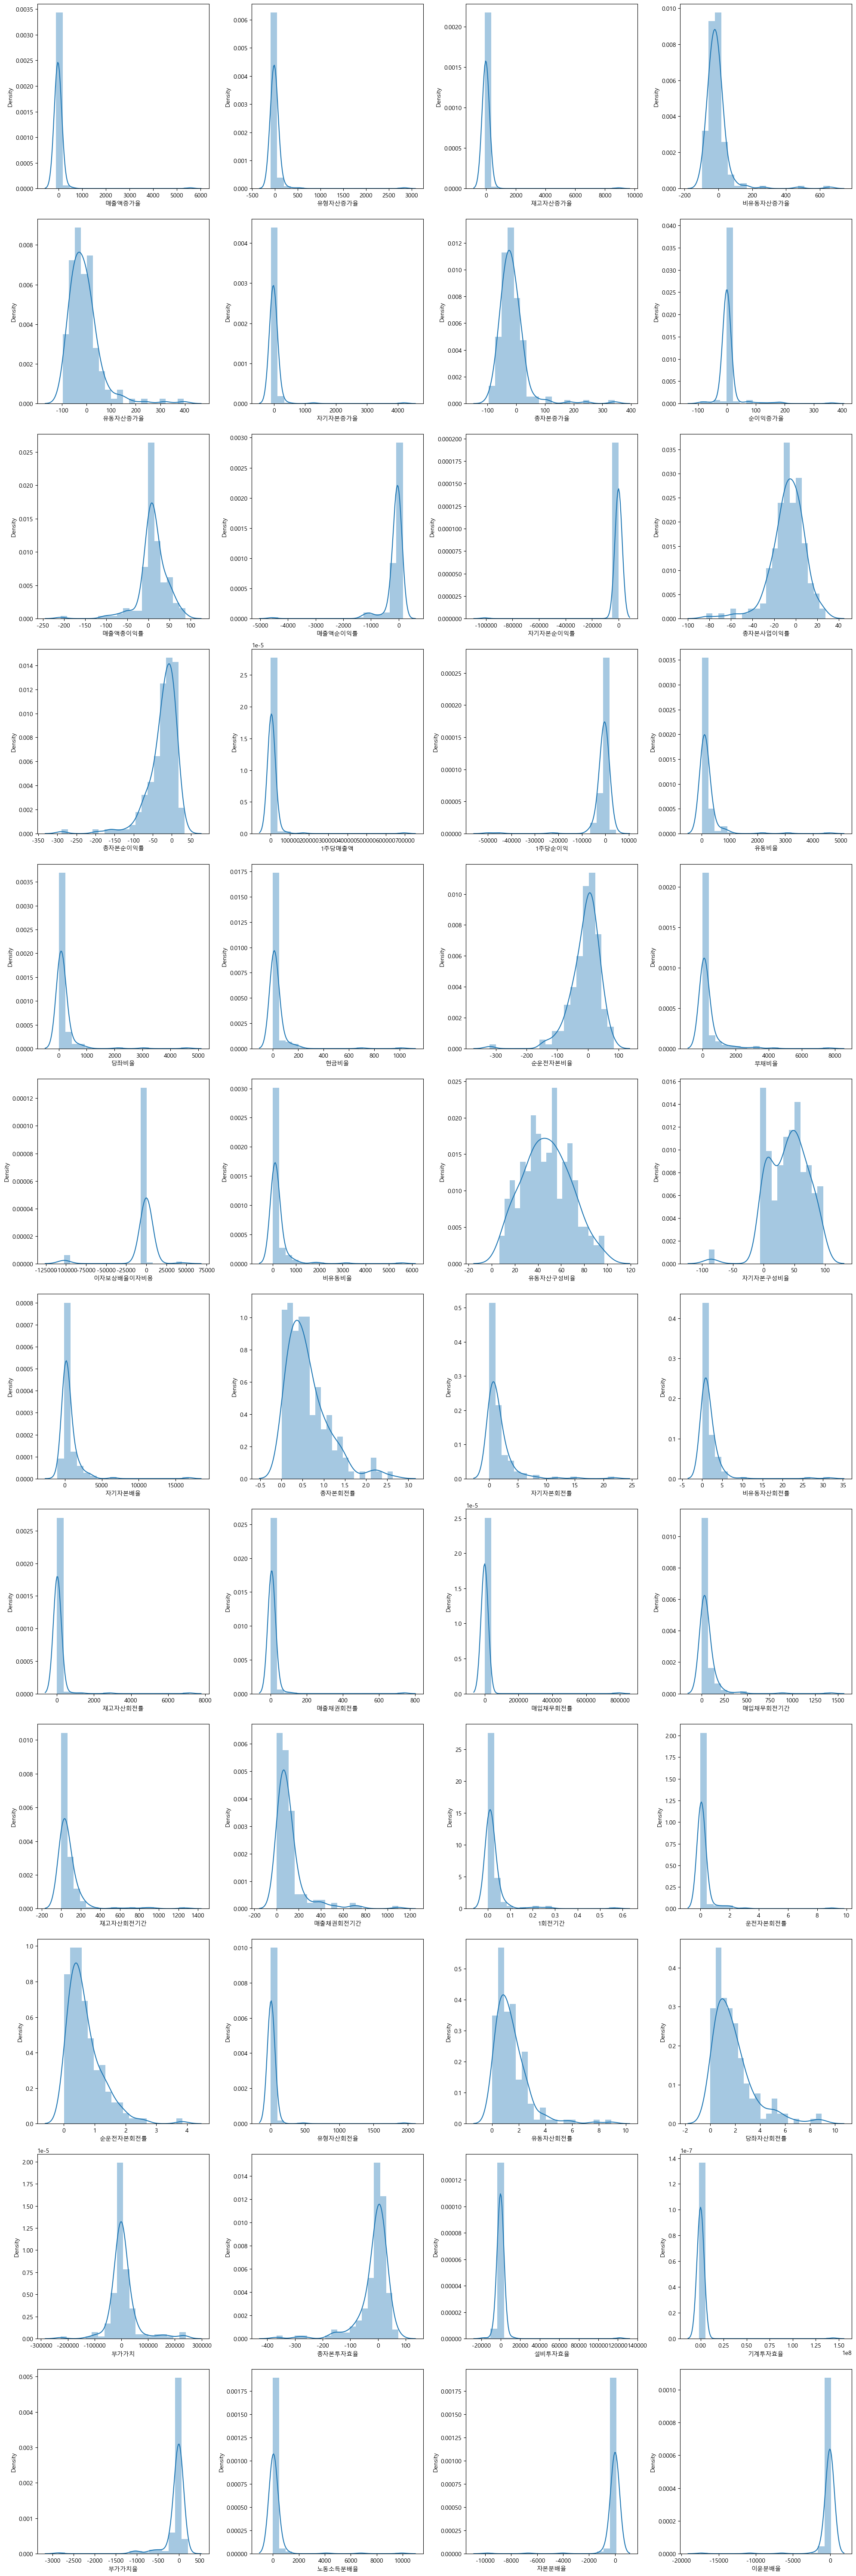

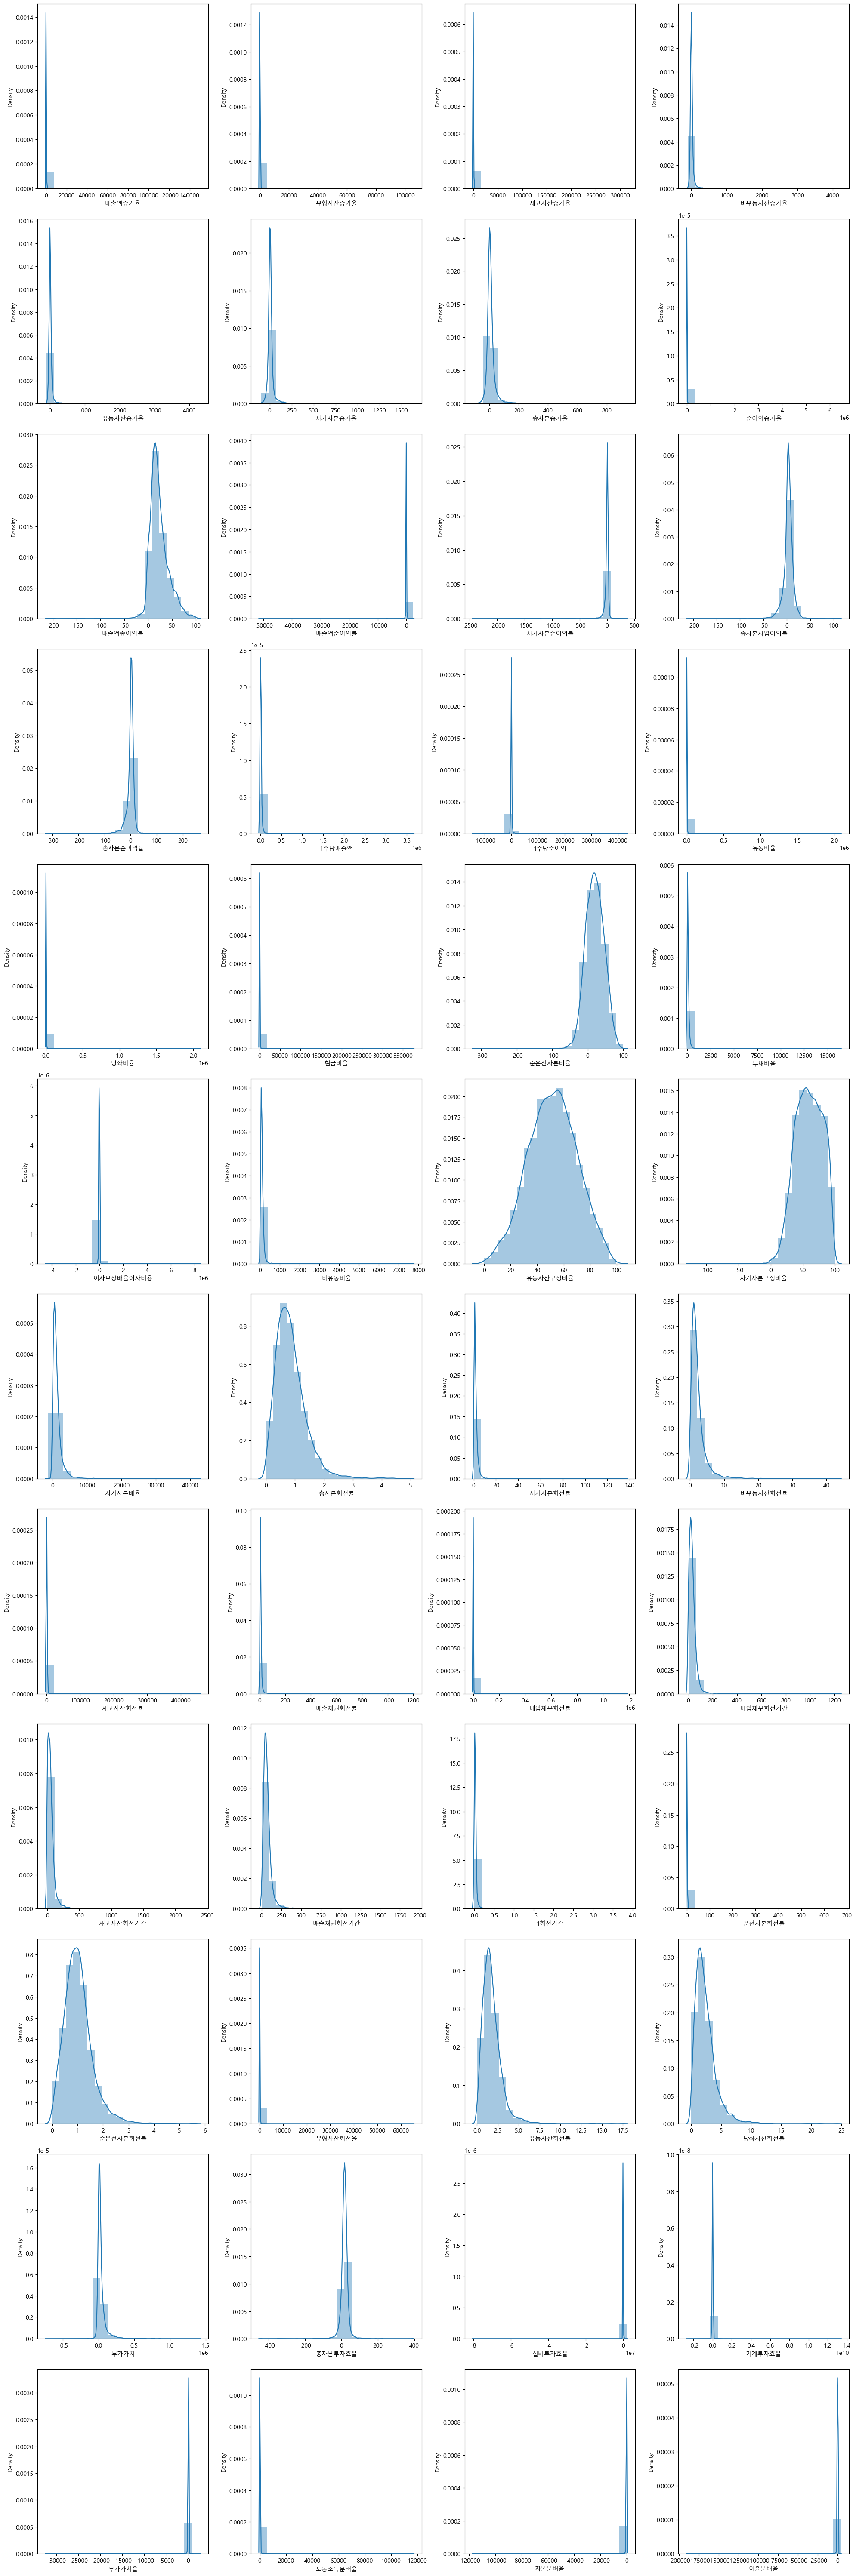

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

# 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')

# 데이터 로드
df = pd.read_csv('../데이터자료/5. label 지정 완료.csv', encoding='cp949')

# 컬럼 선택
selected_columns = df.columns[7:55]

# 데이터 분포 시각화 함수
def plot_data_distribution(data, columns, plot_type, nrows, ncols, figsize):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    for i, col in enumerate(columns):
        if plot_type == 'histogram':
            sns.distplot(data[col], bins=20, ax=axes[int(i/ncols), int(i%ncols)])
        elif plot_type == 'qqplot':
            stats.probplot(data[col], dist=stats.norm, plot=axes[int(i/ncols), int(i%ncols)])
        elif plot_type == 'boxplot':
            data.boxplot(column=col, ax=axes[int(i/ncols), int(i%ncols)])
    plt.tight_layout()
    plt.show()

# 전체 데이터 히스토그램
plot_data_distribution(df, selected_columns, 'histogram', nrows=12, ncols=4, figsize=(20, 60))

# 전체 데이터 QQ Plot
plot_data_distribution(df, selected_columns, 'qqplot', nrows=12, ncols=4, figsize=(30, 60))

# 전체 데이터 박스플롯
plot_data_distribution(df, selected_columns, 'boxplot', nrows=12, ncols=4, figsize=(30, 60))

# 부실 기업 데이터
df_default = df[df["label"] == 1]

# 부실 기업 히스토그램
plot_data_distribution(df_default, selected_columns, 'histogram', nrows=12, ncols=4, figsize=(20, 60))

# 정상 기업 데이터
df_continue = df[df["label"] == 0]

# 정상 기업 히스토그램
plot_data_distribution(df_continue, selected_columns, 'histogram', nrows=12, ncols=4, figsize=(20, 60))
